In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3  

In [6]:
db_file = r'C:\Users\Anusha\Downloads\queue_system_sqlite3.db'   #giving the path to the sqlite database file.
connection = sqlite3.connect(db_file)    #connecting to the database.

In [7]:
tables_query = "SELECT name FROM sqlite_master WHERE type='table' ;"    #listing all the tables present in the database.
tables = pd.read_sql(tables_query, connection)
print(f'Tables in Database are: \n{tables}')    #printing the dataframe with the list of tables present in the database.

Tables in Database are: 
                    name
0          call_statuses
1        sqlite_sequence
2                  calls
3               counters
4                   jobs
5              languages
6            permissions
7                 queues
8   role_has_permissions
9                  roles
10              services
11                 users


In [8]:
queue_df = pd.read_sql("SELECT * FROM queues", connection)
call_df = pd.read_sql("SELECT * FROM calls", connection)
status_df = pd.read_sql("SELECT * FROM  call_statuses", connection)
counter_df = pd.read_sql("SELECT * FROM counters", connection)
services_df = pd.read_sql("SELECT * FROM services", connection)
user_df = pd.read_sql("SELECT * FROM users", connection)    #loaded the tables from database into the dataframe.

In [6]:
call_df.head()   #previewing the first 5 data from the table calls.

,id,queue_id,service_id,counter_id,user_id,token_letter,token_number,called_date,started_at,ended_at,waiting_time,served_time,turn_around_time,created_at,updated_at,call_status_id
0,28,45,1,2,2,W,1,2024-01-25,2024-01-25 18:26:13,2024-01-25 18:34:14,00:06:45,00:08:01,00:14:46,2024-01-25 18:34:01,2024-01-25 18:34:14,1.0
1,29,46,1,2,2,W,2,2024-01-25,2024-01-25 18:34:16,2024-01-25 18:34:24,00:13:39,00:00:08,00:13:47,2024-01-25 18:34:16,2024-01-25 18:34:24,1.0
2,30,48,2,2,2,NR,1,2024-01-25,2024-01-25 18:34:53,None,00:00:13,None,None,2024-01-25 18:34:53,2024-01-25 18:34:53,NaN
3,31,47,1,2,2,W,3,2024-01-25,2024-01-25 18:35:14,2024-01-25 18:35:18,00:10:17,00:00:04,00:10:21,2024-01-25 18:35:14,2024-01-25 18:35:18,1.0
4,32,50,3,3,2,T,1,2024-01-25,2024-01-25 18:35:58,2024-01-25 18:37:00,00:00:29,00:01:02,00:01:31,2024-01-25 18:35:58,2024-01-25 18:37:00,1.0


In [7]:
user_df.head()      #previewing the first 5 data from user tables.

,id,name,email,email_verified_at,password,remember_token,created_at,updated_at,image
0,1,Diwash Ale,diwas.ale@pathao.com,None,$2y$10$Ak3Sq4ZcPZO9wwKfvpHv/ePFQ9oyYugEBoG3b0k...,None,2024-01-23 04:28:34,2024-01-23 10:15:05,profile/tG9vjs4qUtWiDJuu7gAxgMOpVti6i1oe0IM9Q2...
1,2,Nandu Acharaya,nanda.acharya@pathao.com,None,$2y$10$Z0yt.rVs3CaSJuncPtxUAuECePoSGeegLNzW6mu...,None,2024-01-23 10:16:45,2024-01-23 18:46:14,profile/SrVxywZEcODMdL4r1sjekFsRgv5bXIPnwQfVdS...
2,3,Kendra Regmi,kendra.regmi@pathao.com,None,$2y$10$U.b2x9Lq7RJQLzkr3Fuf5e2Ep4brGFUT.Fh.FqB...,None,2024-01-23 10:25:41,2024-01-23 10:26:38,None
3,4,Ajaya Limbu,ajaya@pathao.com,None,$2y$10$8WLQkS.jmITlfkT/w/vEdOWlZXSgPZ4JqdcID4n...,None,2024-01-23 11:56:16,2024-01-23 11:56:16,None
4,5,Mahima Kalikote,mahima@pathao.com,None,$2y$10$dCAKfP.PGLyjpN5wMP.8eumKMtOY2pn07lqPKyI...,None,2024-01-23 18:38:05,2024-01-23 18:38:05,None


In [8]:
user_df.tail()    #previewing the buttom 5 data from table users.

,id,name,email,email_verified_at,password,remember_token,created_at,updated_at,image
10,11,Lokendra Sunar,sunarlokendra45@gmail.com,None,$2y$10$Ve2SkitUdRR3ghow8A7BtOknPWQFNKfysuqQvzb...,None,2024-01-23 18:41:57,2024-01-23 18:41:57,None
11,12,Jyoti BK,jyotibk349@gmail.com,None,$2y$10$GAtqNBjblYSIwVtj6Btnv..kD8zGDEidr6CXcK5...,None,2024-01-23 18:43:08,2024-01-23 18:43:08,None
12,13,Suyog Tamang,suyog.tamang@pathao.com,None,$2y$10$gCxbBFwo17zHQKiXhkVe9uH3SxeDd3Nbvw4dkML...,None,2024-01-23 18:43:32,2024-01-23 18:43:32,None
13,14,Rujan Shrestha,rujanshrestha78@gmail.com,None,$2y$10$lPxwkT0raBkhzk6jDRLJn.P2g6tABBtBBbbN1Y0...,None,2024-01-31 10:23:25,2024-01-31 10:23:25,None
14,15,Rahul khadka,rahulkhadka2074@gmail.com,None,$2y$10$mm64uXtJN1qcCZ9JdeJnt.rcF9NiOnAMn6UI8H1...,None,2024-01-31 10:24:06,2024-02-01 09:56:50,None


In [9]:
queue_df.isnull().sum()      # checking the missing values present in the queue dataframe.

id                 0
service_id         0
number             0
called             0
reference_no       0
letter             0
name            3374
email           3374
phone           3374
position           0
created_at         0
updated_at         0
dtype: int64

In [10]:
queue_df.drop('name',axis=1, inplace=True)
queue_df.drop(['email', 'phone'], axis=1, inplace=True)
queue_df.isnull().sum()      #handled the missing values, by dropping the name,email and phone column as it was missing majority of the values.
queue_df.shape   #checked the shape of a queue df

(3374, 9)

In [11]:
call_df.isnull().sum()    #here we observed that some of the column are having missing values.

id                    0
queue_id              0
service_id            0
counter_id            0
user_id               0
token_letter          0
token_number          0
called_date           0
started_at            0
ended_at             19
waiting_time          0
served_time         617
turn_around_time    617
created_at            0
updated_at            0
call_status_id       19
dtype: int64

In [12]:
call_df.fillna(method='ffill', inplace=True)    #handled the missing values here again.
call_df.isnull().sum()

C:\Users\Anusha\AppData\Local\Temp\ipykernel_21064\2013536220.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  call_df.fillna(method='ffill', inplace=True)    #handled the missing values here again.


id                  0
queue_id            0
service_id          0
counter_id          0
user_id             0
token_letter        0
token_number        0
called_date         0
started_at          0
ended_at            0
waiting_time        0
served_time         0
turn_around_time    0
created_at          0
updated_at          0
call_status_id      0
dtype: int64

In [13]:
call_df.drop_duplicates(inplace=True)
queue_df.drop_duplicates(inplace=True)
#here we removed the duplicates from thev call and queue dataframe.

In [14]:
call_df = call_df.merge(status_df, left_on='call_status_id', right_on='id', suffixes=('', '_status'))  #merged calls with status to get status name.
print(call_df.head())


   id  queue_id  service_id  counter_id  user_id token_letter  token_number  \
0  28        45           1           2        2            W             1   
1  29        46           1           2        2            W             2   
2  30        48           2           2        2           NR             1   
3  31        47           1           2        2            W             3   
4  32        50           3           3        2            T             1   

  called_date           started_at             ended_at waiting_time  \
0  2024-01-25  2024-01-25 18:26:13  2024-01-25 18:34:14     00:06:45   
1  2024-01-25  2024-01-25 18:34:16  2024-01-25 18:34:24     00:13:39   
2  2024-01-25  2024-01-25 18:34:53  2024-01-25 18:34:24     00:00:13   
3  2024-01-25  2024-01-25 18:35:14  2024-01-25 18:35:18     00:10:17   
4  2024-01-25  2024-01-25 18:35:58  2024-01-25 18:37:00     00:00:29   

  served_time turn_around_time           created_at           updated_at  \
0    00:08:01   

In [10]:
queue_call_df = queue_df.merge(call_df, left_on='id', right_on='queue_id', suffixes=('', '_call'))    #merged queue with call to get service time and info.
queue_call_df.head()

,id,service_id,number,called,reference_no,letter,name,email,phone,position,...,token_number,called_date,started_at,ended_at,waiting_time,served_time,turn_around_time,created_at_call,updated_at_call,call_status_id
0,45,1,1,1,wzkYsTk40,W,None,None,None,0,...,1,2024-01-25,2024-01-25 18:26:13,2024-01-25 18:34:14,00:06:45,00:08:01,00:14:46,2024-01-25 18:34:01,2024-01-25 18:34:14,1.0
1,46,1,2,1,DZYdzvM4P,W,None,None,None,0,...,2,2024-01-25,2024-01-25 18:34:16,2024-01-25 18:34:24,00:13:39,00:00:08,00:13:47,2024-01-25 18:34:16,2024-01-25 18:34:24,1.0
2,47,1,3,1,old87iht8,W,None,None,None,0,...,3,2024-01-25,2024-01-25 18:35:14,2024-01-25 18:35:18,00:10:17,00:00:04,00:10:21,2024-01-25 18:35:14,2024-01-25 18:35:18,1.0
3,48,2,1,1,3BAWSsH6r,NR,None,None,None,0,...,1,2024-01-25,2024-01-25 18:34:53,None,00:00:13,None,None,2024-01-25 18:34:53,2024-01-25 18:34:53,NaN
4,49,2,2,1,JI70zb9z2,NR,None,None,None,0,...,2,2024-01-25,2024-01-25 18:36:48,None,00:02:03,None,None,2024-01-25 18:37:08,2024-01-25 18:37:08,NaN


In [12]:
queue_call_services_df = queue_call_df.merge(services_df, left_on='service_id', right_on='id', suffixes=('', '_services'))  #merged with service to get service name.
queue_call_services_df.head()

,id,service_id,number,called,reference_no,letter,name,email,phone,position,...,status_message_format,status_message_positions,ask_name,name_required,ask_email,email_required,ask_phone,phone_required,created_at_services,updated_at_services
0,45,1,1,1,wzkYsTk40,W,None,None,None,0,...,None,None,0,0,0,0,0,0,2024-01-23 10:29:32,2024-01-23 10:29:32
1,46,1,2,1,DZYdzvM4P,W,None,None,None,0,...,None,None,0,0,0,0,0,0,2024-01-23 10:29:32,2024-01-23 10:29:32
2,47,1,3,1,old87iht8,W,None,None,None,0,...,None,None,0,0,0,0,0,0,2024-01-23 10:29:32,2024-01-23 10:29:32
3,56,1,1,1,d9SPneLvn,W,None,None,None,0,...,None,None,0,0,0,0,0,0,2024-01-23 10:29:32,2024-01-23 10:29:32
4,58,1,2,1,VLYbPWviu,W,None,None,None,0,...,None,None,0,0,0,0,0,0,2024-01-23 10:29:32,2024-01-23 10:29:32


In [13]:
complete_df = queue_call_services_df.merge(counter_df, left_on='counter_id', right_on='id', suffixes=('', '_counter')) #merged with counter to get countername.
complete_df.head()

,id,service_id,number,called,reference_no,letter,name,email,phone,position,...,email_required,ask_phone,phone_required,created_at_services,updated_at_services,id_counter,name_counter,status_counter,created_at_counter,updated_at_counter
0,45,1,1,1,wzkYsTk40,W,None,None,None,0,...,0,0,0,2024-01-23 10:29:32,2024-01-23 10:29:32,2,Counter 2,1,2024-01-23 10:29:24,2024-01-23 10:29:24
1,46,1,2,1,DZYdzvM4P,W,None,None,None,0,...,0,0,0,2024-01-23 10:29:32,2024-01-23 10:29:32,2,Counter 2,1,2024-01-23 10:29:24,2024-01-23 10:29:24
2,47,1,3,1,old87iht8,W,None,None,None,0,...,0,0,0,2024-01-23 10:29:32,2024-01-23 10:29:32,2,Counter 2,1,2024-01-23 10:29:24,2024-01-23 10:29:24
3,56,1,1,1,d9SPneLvn,W,None,None,None,0,...,0,0,0,2024-01-23 10:29:32,2024-01-23 10:29:32,2,Counter 2,1,2024-01-23 10:29:24,2024-01-23 10:29:24
4,58,1,2,1,VLYbPWviu,W,None,None,None,0,...,0,0,0,2024-01-23 10:29:32,2024-01-23 10:29:32,2,Counter 2,1,2024-01-23 10:29:24,2024-01-23 10:29:24


In [14]:
complete_df = complete_df.merge(user_df, left_on='user_id', right_on='id', suffixes=('', '_user'))  #merged with user to get agent information.
complete_df.head()

,id,service_id,number,called,reference_no,letter,name,email,phone,position,...,updated_at_counter,id_user,name_user,email_user,email_verified_at,password,remember_token,created_at_user,updated_at_user,image
0,45,1,1,1,wzkYsTk40,W,None,None,None,0,...,2024-01-23 10:29:24,2,Nandu Acharaya,nanda.acharya@pathao.com,None,$2y$10$Z0yt.rVs3CaSJuncPtxUAuECePoSGeegLNzW6mu...,None,2024-01-23 10:16:45,2024-01-23 18:46:14,profile/SrVxywZEcODMdL4r1sjekFsRgv5bXIPnwQfVdS...
1,46,1,2,1,DZYdzvM4P,W,None,None,None,0,...,2024-01-23 10:29:24,2,Nandu Acharaya,nanda.acharya@pathao.com,None,$2y$10$Z0yt.rVs3CaSJuncPtxUAuECePoSGeegLNzW6mu...,None,2024-01-23 10:16:45,2024-01-23 18:46:14,profile/SrVxywZEcODMdL4r1sjekFsRgv5bXIPnwQfVdS...
2,47,1,3,1,old87iht8,W,None,None,None,0,...,2024-01-23 10:29:24,2,Nandu Acharaya,nanda.acharya@pathao.com,None,$2y$10$Z0yt.rVs3CaSJuncPtxUAuECePoSGeegLNzW6mu...,None,2024-01-23 10:16:45,2024-01-23 18:46:14,profile/SrVxywZEcODMdL4r1sjekFsRgv5bXIPnwQfVdS...
3,48,2,1,1,3BAWSsH6r,NR,None,None,None,0,...,2024-01-23 10:29:24,2,Nandu Acharaya,nanda.acharya@pathao.com,None,$2y$10$Z0yt.rVs3CaSJuncPtxUAuECePoSGeegLNzW6mu...,None,2024-01-23 10:16:45,2024-01-23 18:46:14,profile/SrVxywZEcODMdL4r1sjekFsRgv5bXIPnwQfVdS...
4,732,2,6,1,TtuYcWF5b,NR,None,None,None,0,...,2024-01-23 10:29:34,2,Nandu Acharaya,nanda.acharya@pathao.com,None,$2y$10$Z0yt.rVs3CaSJuncPtxUAuECePoSGeegLNzW6mu...,None,2024-01-23 10:16:45,2024-01-23 18:46:14,profile/SrVxywZEcODMdL4r1sjekFsRgv5bXIPnwQfVdS...


In [15]:
complete_df.columns    #looking after the column names in the complete df.

Index(['id', 'service_id', 'number', 'called', 'reference_no', 'letter',
       'name', 'email', 'phone', 'position', 'created_at', 'updated_at',
       'id_call', 'queue_id', 'service_id_call', 'counter_id', 'user_id',
       'token_letter', 'token_number', 'called_date', 'started_at', 'ended_at',
       'waiting_time', 'served_time', 'turn_around_time', 'created_at_call',
       'updated_at_call', 'call_status_id', 'id_services', 'name_services',
       'letter_services', 'start_number', 'status', 'sms_enabled',
       'optin_message_enabled', 'call_message_enabled',
       'noshow_message_enabled', 'completed_message_enabled',
       'status_message_enabled', 'optin_message_format', 'call_message_format',
       'noshow_message_format', 'completed_message_format',
       'status_message_format', 'status_message_positions', 'ask_name',
       'name_required', 'ask_email', 'email_required', 'ask_phone',
       'phone_required', 'created_at_services', 'updated_at_services',
       'id_

In [16]:
complete_df['waiting_time'] = pd.to_timedelta(complete_df['waiting_time'])
waiting_time_stat = complete_df['waiting_time'].describe()
print(f'Waiting time statistics : \n{waiting_time_stat}')
#here we observed the desriptive statistics of a waiting time.

Waiting time statistics : 
count                         3354
mean     0 days 01:10:08.298151460
std      0 days 00:49:17.112034032
min                0 days 00:00:00
25%         0 days 00:29:31.250000
50%         0 days 01:02:42.500000
75%         0 days 01:40:31.500000
max                0 days 04:55:13
Name: waiting_time, dtype: object


In [17]:
complete_df['served_time'] = pd.to_timedelta(complete_df['served_time'])
served_time_stat = complete_df['served_time'].describe()
print(f'Served time statistics : \n{served_time_stat}')
#here we observed the descriptive statistics of served time.

Served time statistics : 
count                         2737
mean     0 days 00:12:12.123127511
std      0 days 00:11:42.488865779
min                0 days 00:00:01
25%                0 days 00:05:44
50%                0 days 00:10:50
75%                0 days 00:14:58
max                0 days 03:03:44
Name: served_time, dtype: object


C:\Users\Anusha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.show(close=None, block=None)>

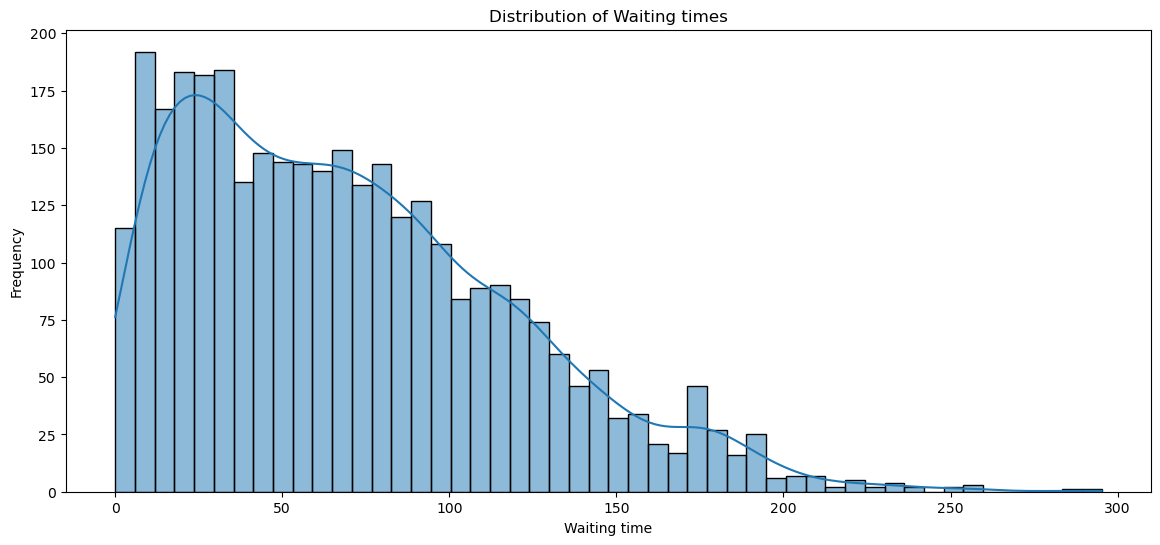

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
sns.histplot(complete_df['waiting_time'].dt.total_seconds() / 60 , bins=50, kde=True)
plt.title('Distribution of Waiting times')
plt.xlabel('Waiting time')
plt.ylabel('Frequency')
plt.show


In [ ]:
#the distribution of waiting times is right skewed,which is indicated by longer tail on the right.the observation suggests that,
#while most of the waiting times are short, there are some instances of longer waiting times aswell.
#there are few outliers beyond the  150 minutes.


C:\Users\Anusha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Anusha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


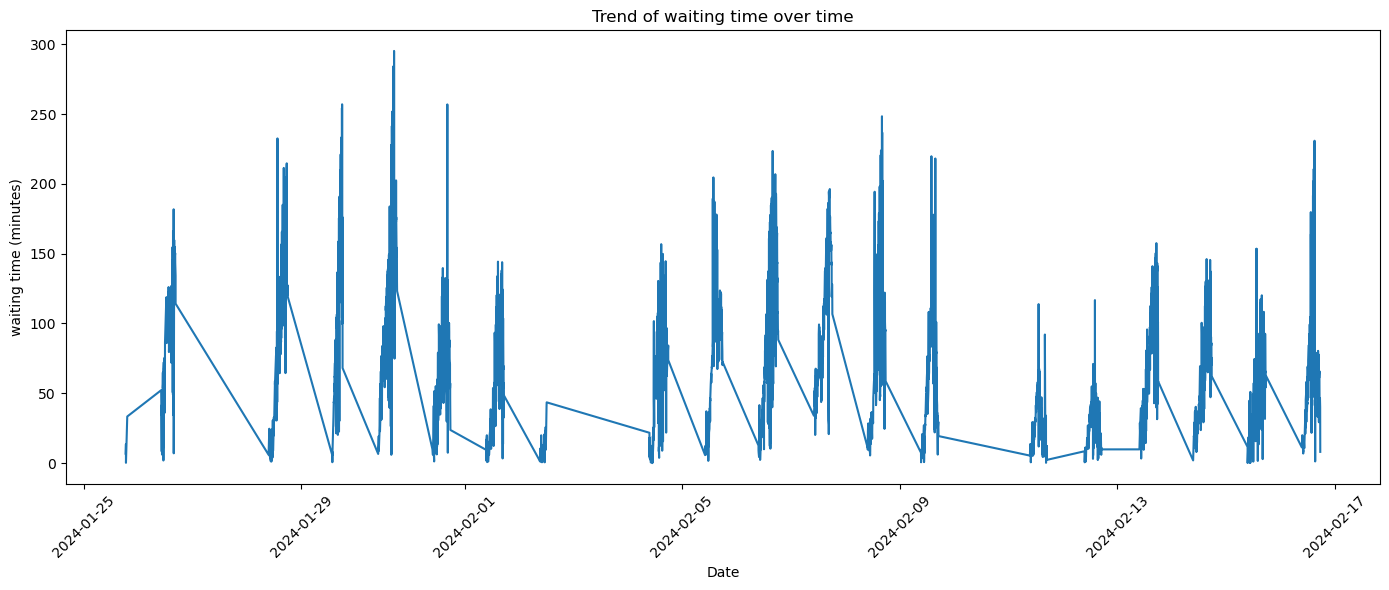

In [24]:
complete_df['started_at'] = pd.to_datetime(complete_df['started_at'], errors='coerce')
complete_df['waiting_time'] = pd.to_timedelta(complete_df['waiting_time'], errors='coerce')
complete_df.dropna(subset=['started_at', 'waiting_time'], inplace=True)
complete_df['waiting_time_minutes'] = complete_df['waiting_time'].dt.total_seconds() / 60
plt.figure(figsize=(14,6))
sns.lineplot(data=complete_df, x= 'started_at', y='waiting_time_minutes', errorbar=None)
plt.title('Trend of waiting time over time')
plt.xlabel('Date')
plt.ylabel('waiting time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()


In [ ]:
#the line chart shows significant fluctuations in waiting times over the times observed.
#the waiting time reach upto 300 minutes during peak periods, line dips nearly to zero level aswell.

Text(0.5, 1.0, 'Correlation Matrix')

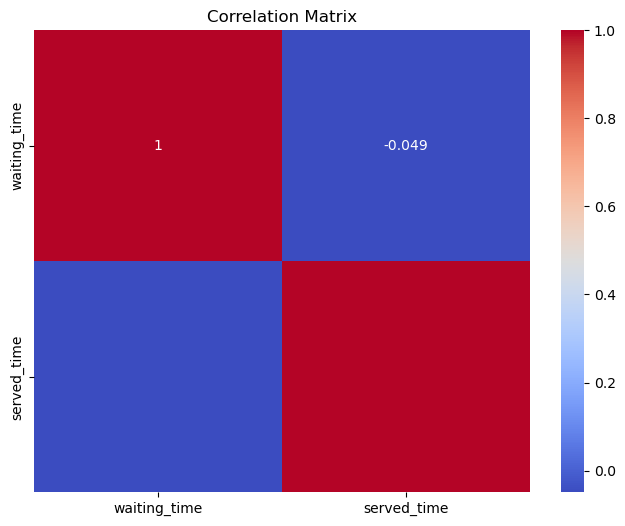

In [29]:
correlation_matrix = complete_df[['waiting_time', 'served_time']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')


In [ ]:
#the correlation coefficient of waiting_time is 1 indicating a perfect correlation.
#the correlation coefficient betweeen waiting_time and served time indicates almost no linear correlation.